# Visualise the results

In [15]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [16]:
data_folder = "../../../demoland_data"

In [17]:
meta_path = f"{data_folder}/spatial_units_test/meta.json"

with open(meta_path, "r") as f:
    data = json.load(f)

In [18]:
df = pd.DataFrame()
i = 0
for city in data:
    for geom in data[city]:
        for model in data[city][geom]:
            for loop in data[city][geom][model]:
                df.loc[
                    i,
                    ["city", "geom", "model", "loop"]
                    + list(data[city][geom][model][loop].keys()),
                ] = [city, geom, model, loop] + list(
                    data[city][geom][model][loop].values()
                )
                i += 1

In [19]:
df["moran_diff"] = df.moran_obs - df.moran_pred

In [20]:
df

,city,geom,model,loop,mse,me,r2,moran_obs,moran_pred,mse_ET,me_ET,r2_ET,moran_diff
0,leeds,h3,air,loop_0,0.844604,0.643698,0.762393,0.936367,0.916660,1.518357,0.896814,0.650468,0.019707
1,leeds,h3,air,loop_1,1.026369,0.737348,0.684926,0.930751,0.911495,1.262087,0.890221,0.700354,0.019255
2,leeds,h3,air,loop_2,1.008534,0.759985,0.715064,0.931455,0.924546,1.615758,1.010753,0.681872,0.006909
3,leeds,h3,air,loop_3,0.749698,0.638040,0.769448,0.928425,0.911477,0.969968,0.748710,0.764570,0.016947
4,leeds,h3,air,loop_4,0.966321,0.702529,0.677271,0.908354,0.893393,1.022066,0.775853,0.728158,0.014961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,newcastle,oa,hp,loop_0,0.133838,0.290613,0.131516,0.237883,0.424289,0.856371,0.310528,0.545572,-0.186406
66,newcastle,oa,hp,loop_1,0.107513,0.258260,0.202793,0.283950,0.229033,0.716602,0.265287,0.551736,0.054917
67,newcastle,oa,hp,loop_2,0.134936,0.296302,0.238145,0.299248,0.278544,0.739211,0.308141,0.547772,0.020704
68,newcastle,oa,hp,loop_3,0.129887,0.281948,-0.010993,0.191979,0.204745,0.625099,0.294498,0.529002,-0.012766


## Summary

Text(0.5, 0.98, 'Air Pollution')

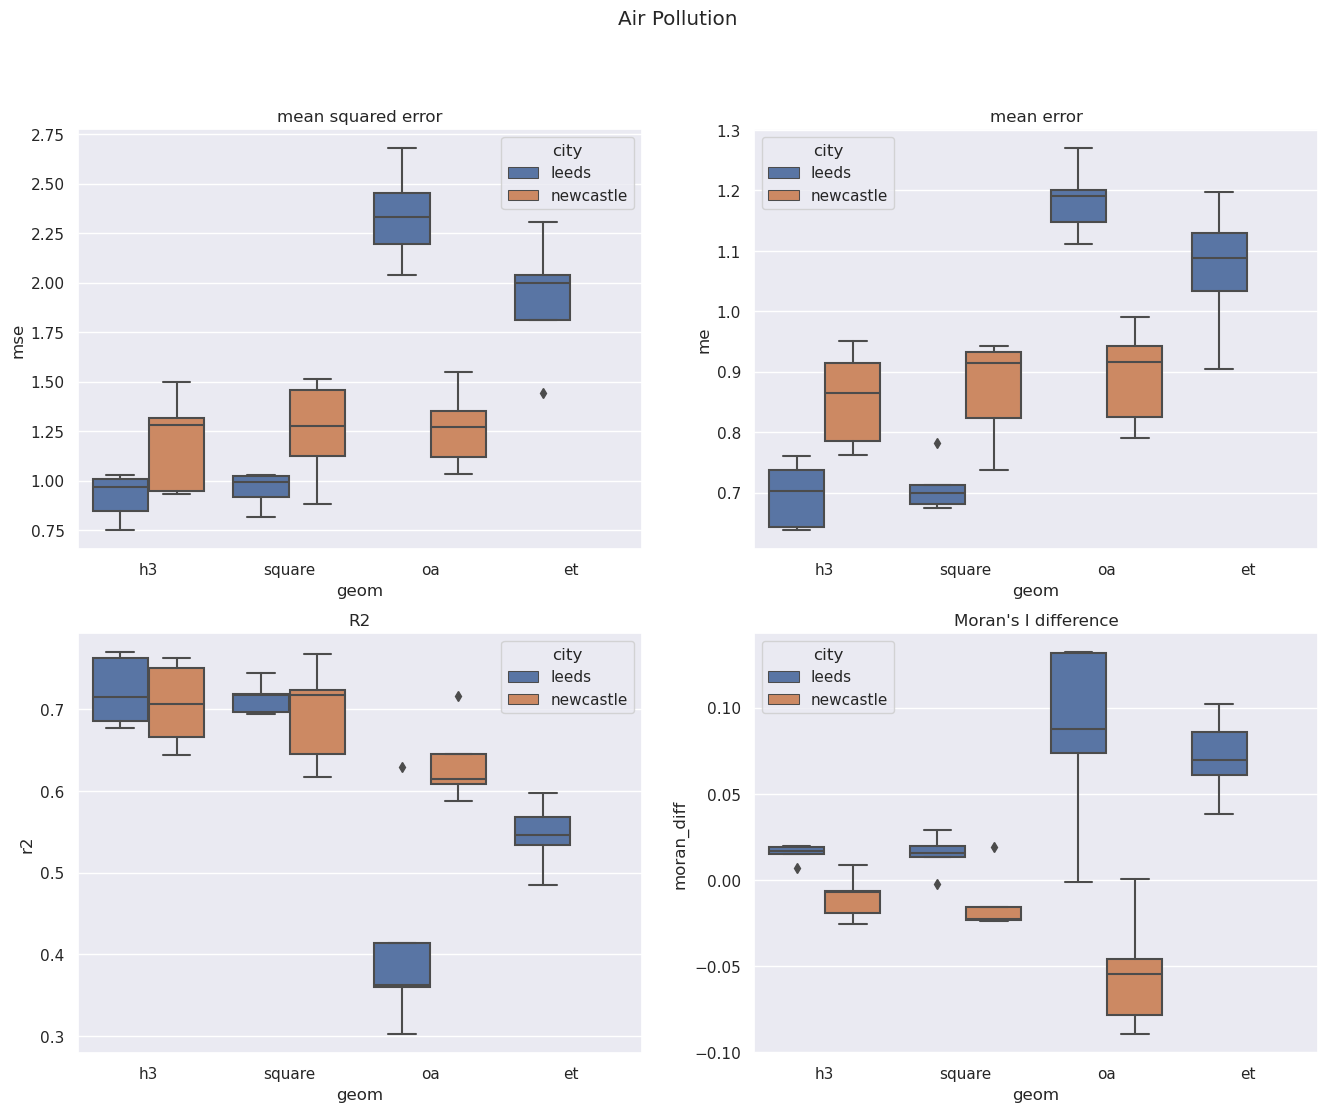

In [21]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(
    data=df.query("model == 'air'"), x="geom", y="mse", hue="city", ax=axs[0][0]
)
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="me", hue="city", ax=axs[0][1])
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="r2", hue="city", ax=axs[1][0])
sns.boxplot(
    data=df.query("model == 'air'"), x="geom", y="moran_diff", hue="city", ax=axs[1][1]
)
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("Air Pollution")

Text(0.5, 0.98, 'House price')

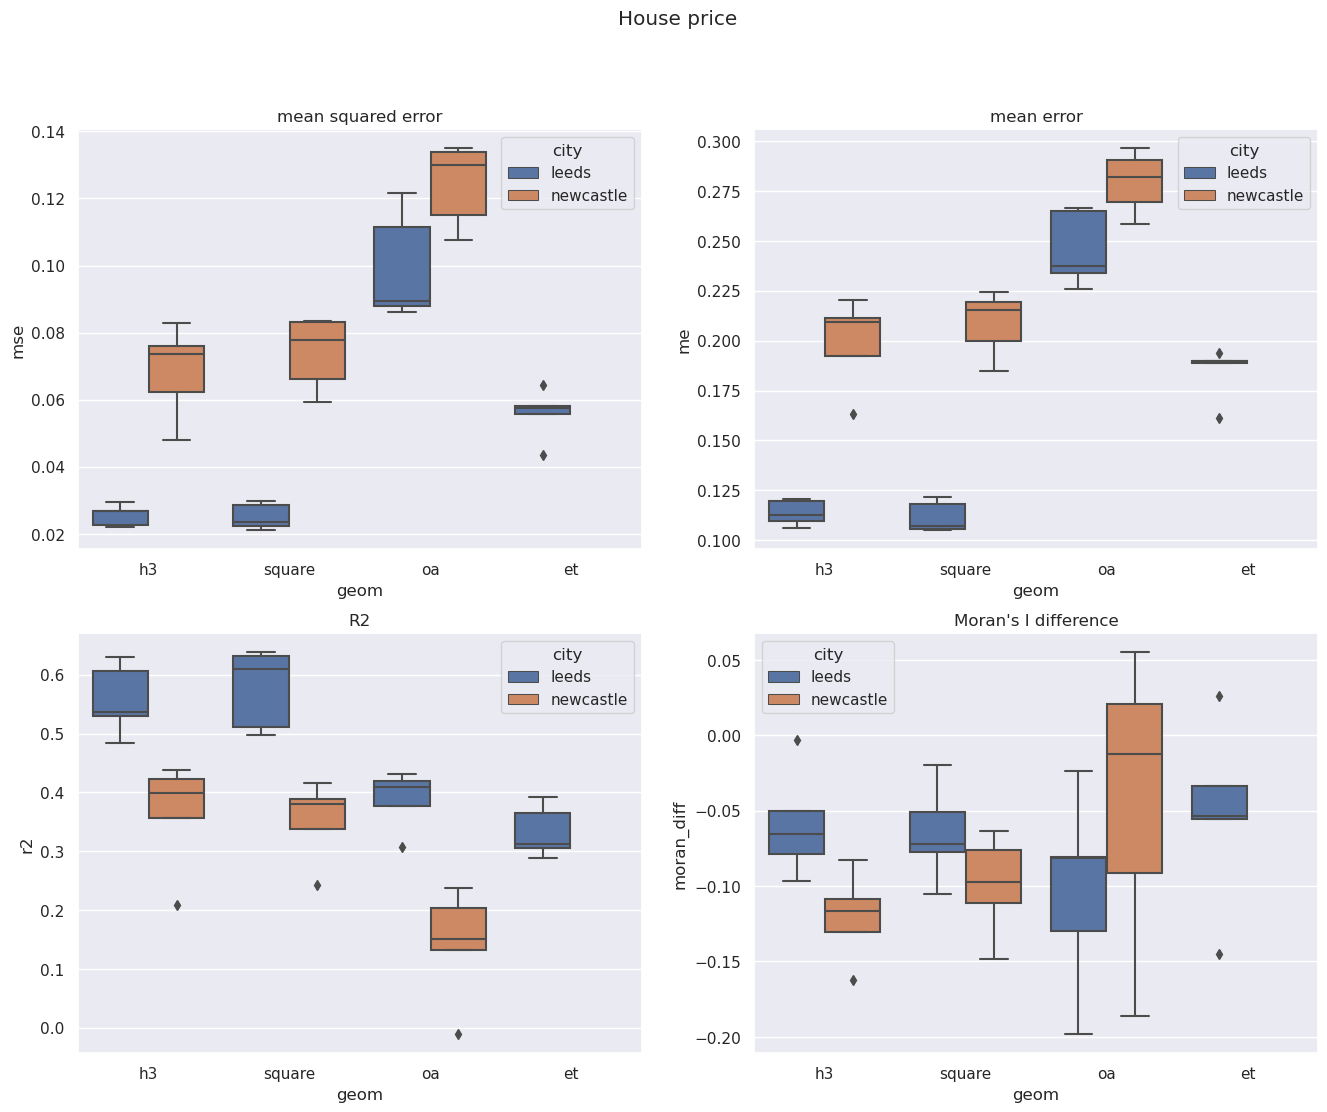

In [22]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="mse", hue="city", ax=axs[0][0])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="me", hue="city", ax=axs[0][1])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="r2", hue="city", ax=axs[1][0])
sns.boxplot(
    data=df.query("model == 'hp'"), x="geom", y="moran_diff", hue="city", ax=axs[1][1]
)
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("House price")

## Explore differences within splits

Text(0.5, 0.98, 'Air pollution')

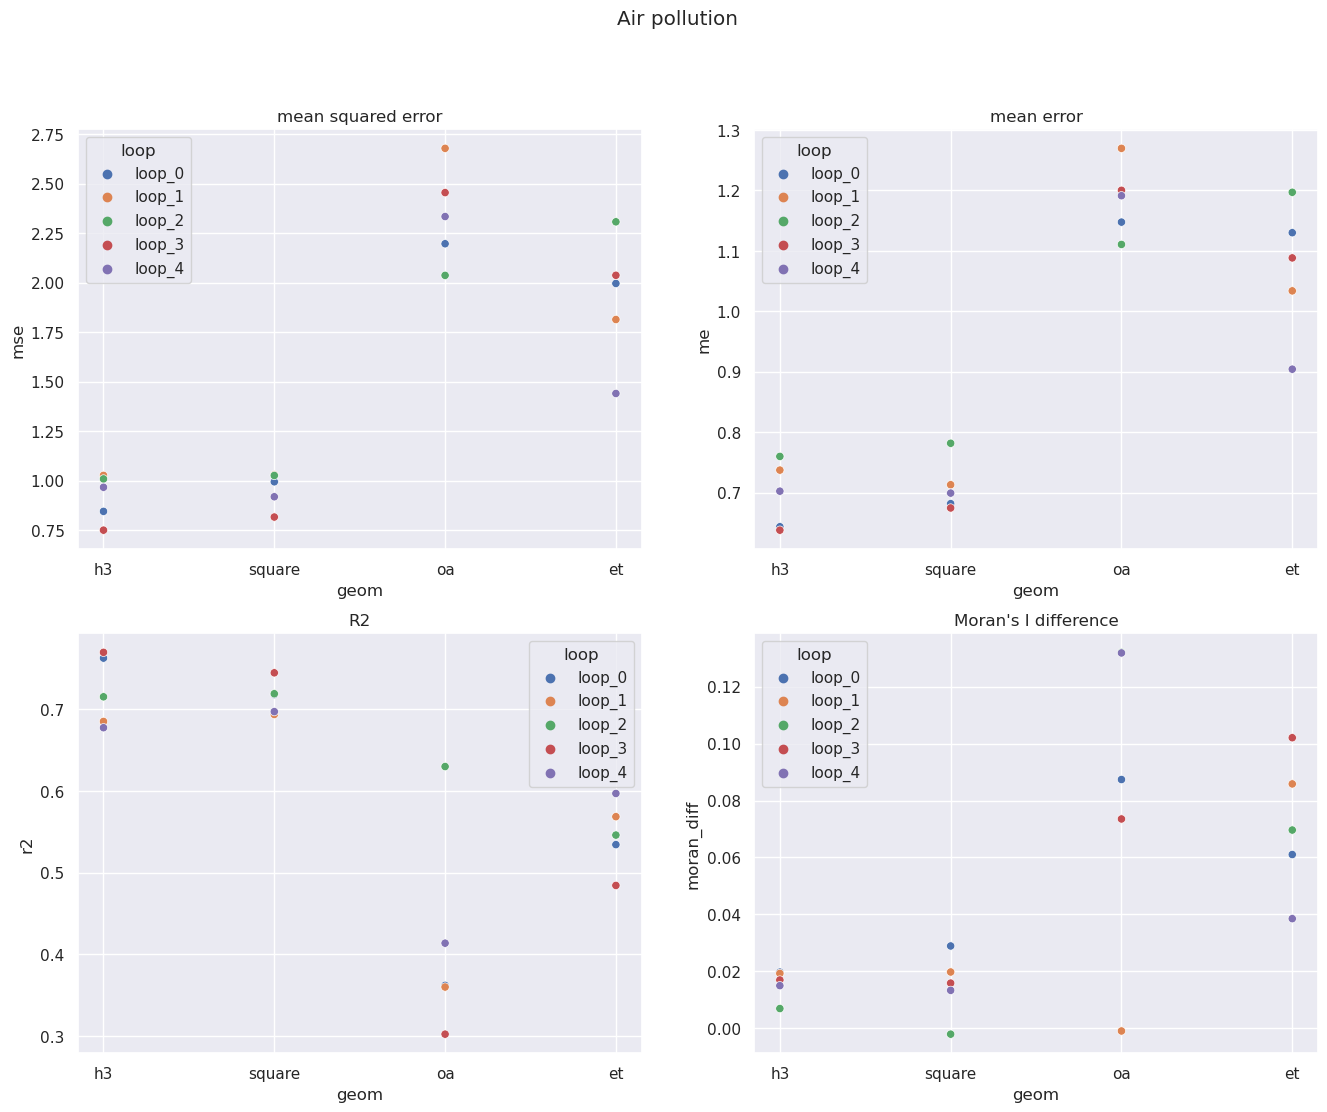

In [23]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(
    data=df.query("(model == 'air')").query("(city == 'leeds')"),
    x="geom",
    y="mse",
    hue="loop",
    ax=axs[0][0],
)
sns.scatterplot(
    data=df.query("(model == 'air')").query("(city == 'leeds')"),
    x="geom",
    y="me",
    hue="loop",
    ax=axs[0][1],
)
sns.scatterplot(
    data=df.query("(model == 'air')").query("(city == 'leeds')"),
    x="geom",
    y="r2",
    hue="loop",
    ax=axs[1][0],
)
sns.scatterplot(
    data=df.query("(model == 'air')").query("(city == 'leeds')"),
    x="geom",
    y="moran_diff",
    hue="loop",
    ax=axs[1][1],
)
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("Air pollution")

Text(0.5, 0.98, 'House price')

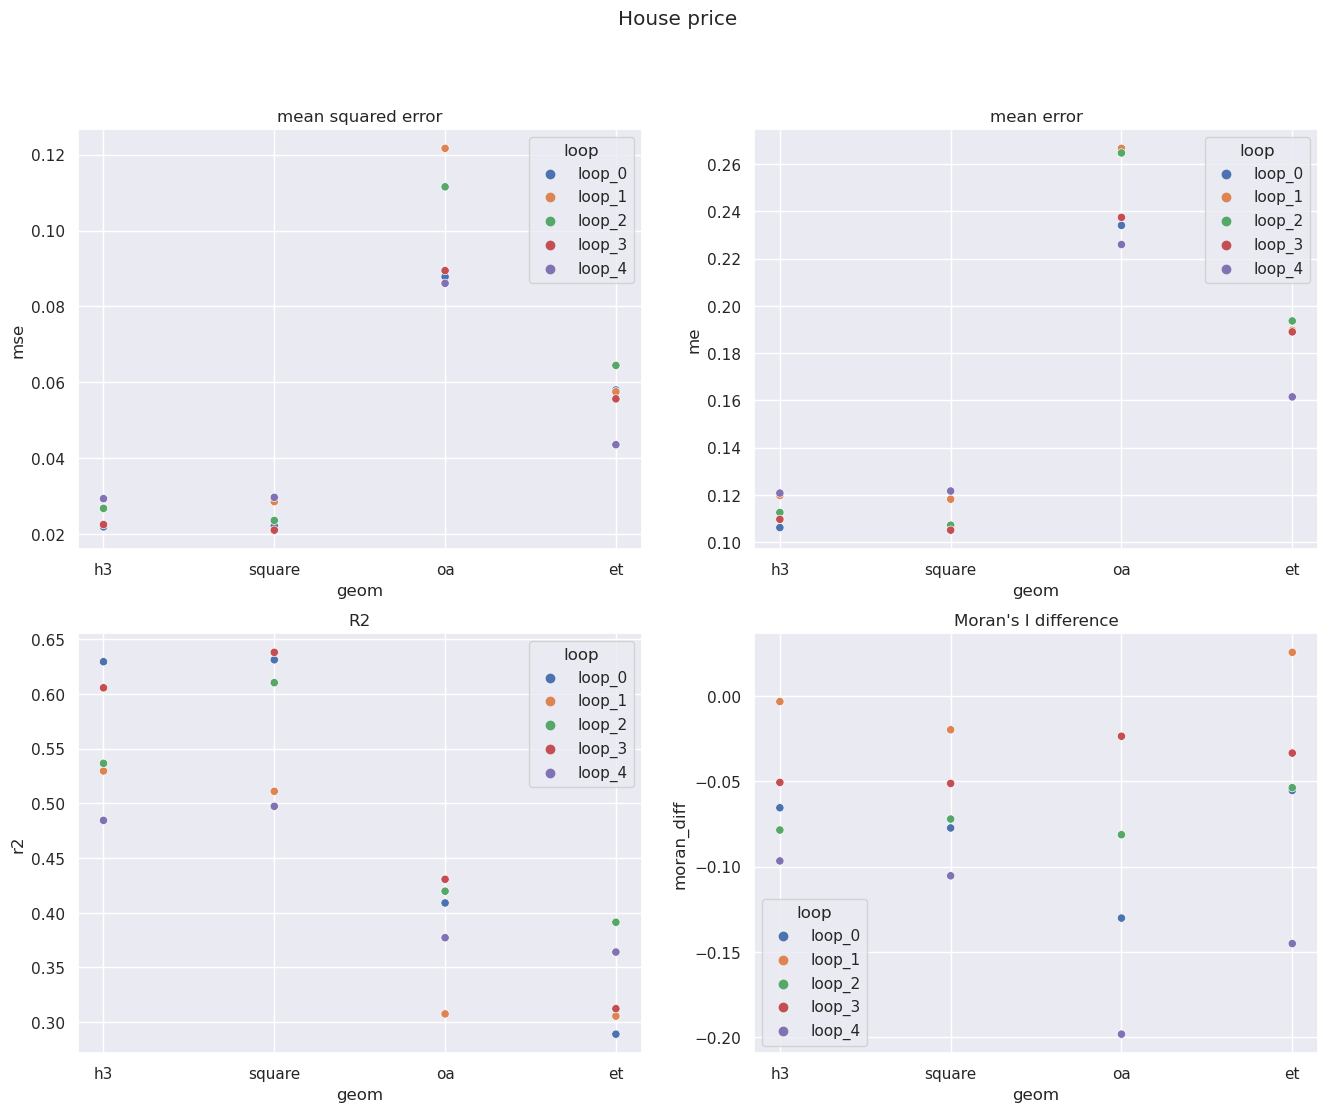

In [24]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(
    data=df.query("(model == 'hp')").query("(city == 'leeds')"),
    x="geom",
    y="mse",
    hue="loop",
    ax=axs[0][0],
)
sns.scatterplot(
    data=df.query("(model == 'hp')").query("(city == 'leeds')"),
    x="geom",
    y="me",
    hue="loop",
    ax=axs[0][1],
)
sns.scatterplot(
    data=df.query("(model == 'hp')").query("(city == 'leeds')"),
    x="geom",
    y="r2",
    hue="loop",
    ax=axs[1][0],
)
sns.scatterplot(
    data=df.query("(model == 'hp')").query("(city == 'leeds')"),
    x="geom",
    y="moran_diff",
    hue="loop",
    ax=axs[1][1],
)
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("House price")

Text(0.5, 0.98, 'Air Pollution')

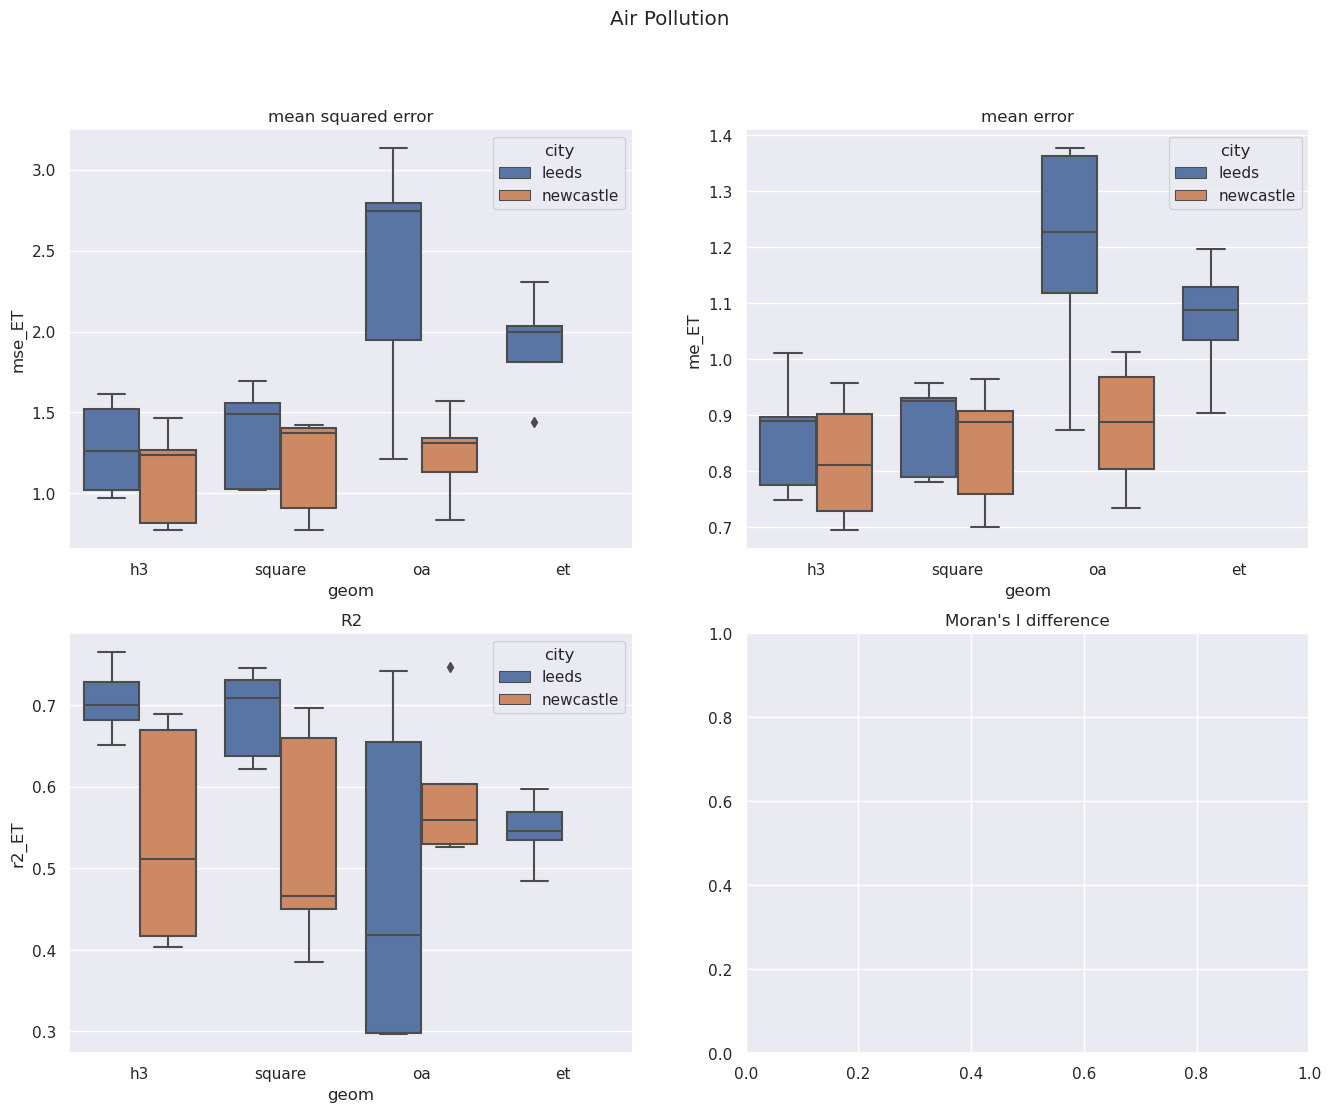

In [25]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(
    data=df.query("model == 'air'"), x="geom", y="mse_ET", hue="city", ax=axs[0][0]
)
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="me_ET", hue="city", ax=axs[0][1])
sns.boxplot(data=df.query("model == 'air'"), x="geom", y="r2_ET", hue="city", ax=axs[1][0])
# sns.boxplot(
#     data=df.query("model == 'air'"), x="geom", y="moran_diff", hue="city", ax=axs[1][1]
# )
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("Air Pollution")

Text(0.5, 0.98, 'House price')

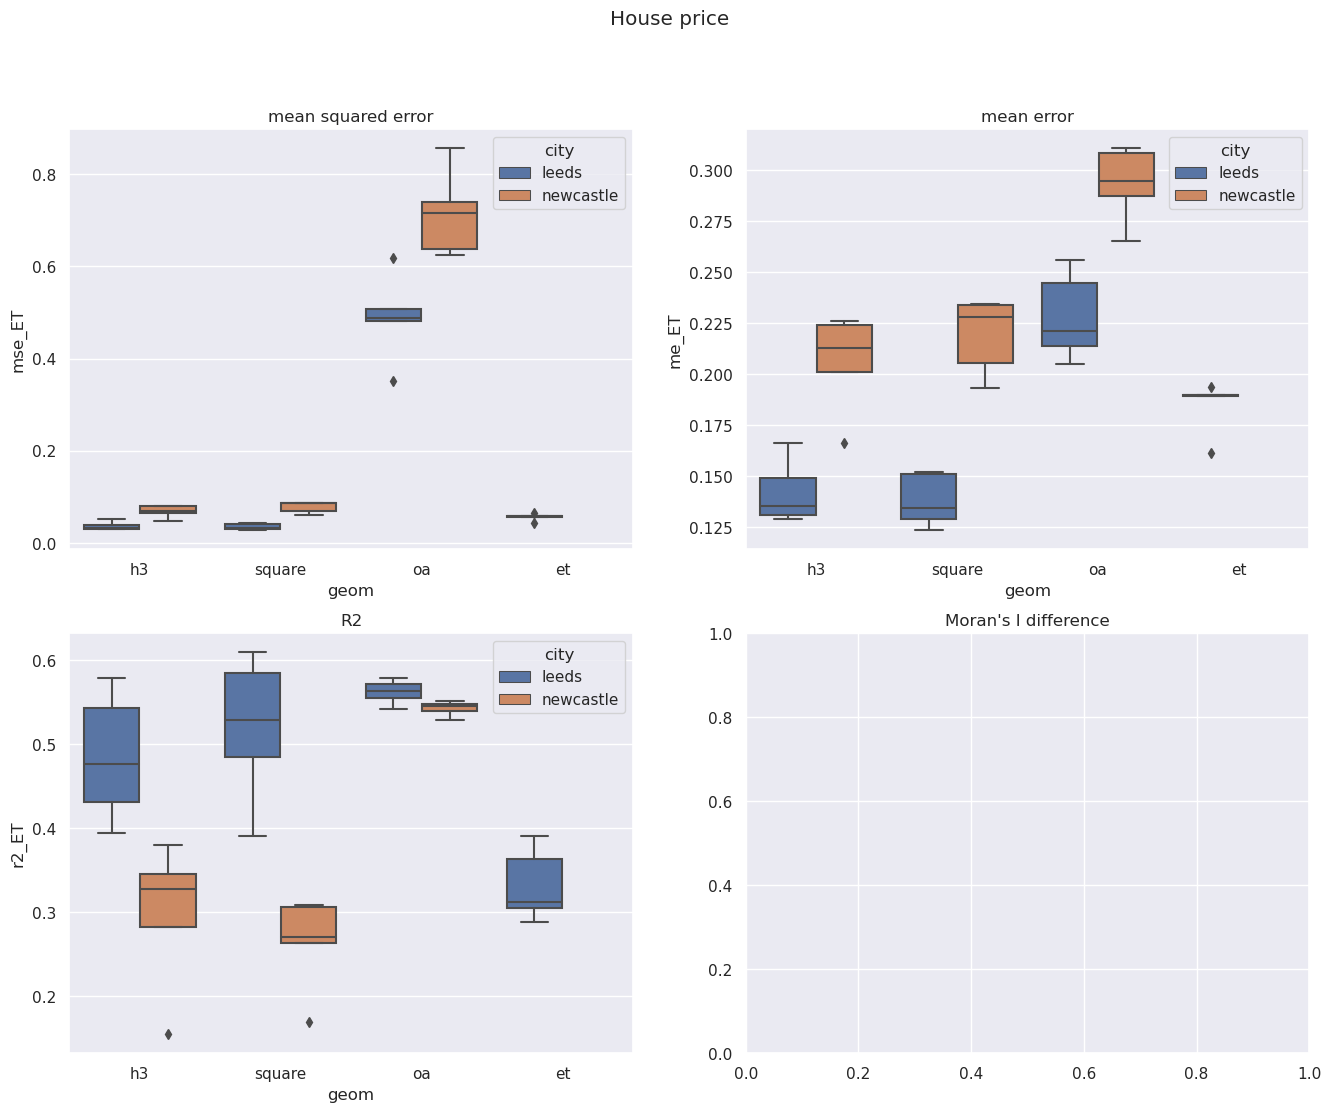

In [26]:
f, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="mse_ET", hue="city", ax=axs[0][0])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="me_ET", hue="city", ax=axs[0][1])
sns.boxplot(data=df.query("model == 'hp'"), x="geom", y="r2_ET", hue="city", ax=axs[1][0])
# sns.boxplot(
#     data=df.query("model == 'hp'"), x="geom", y="moran_diff", hue="city", ax=axs[1][1]
# )
axs[0][0].set_title("mean squared error")
axs[0][1].set_title("mean error")
axs[1][0].set_title("R2")
axs[1][1].set_title("Moran's I difference")
f.suptitle("House price")